In [ ]:
%matplotlib inline
import numpy as np
import scipy
import scipy.io
import scipy.sparse as sp
import matplotlib.pyplot as plt
from helpers import *
from plots import *
from mf_sgd import *
%load_ext autoreload
%autoreload 2

number of items: 10000, number of users: 1000


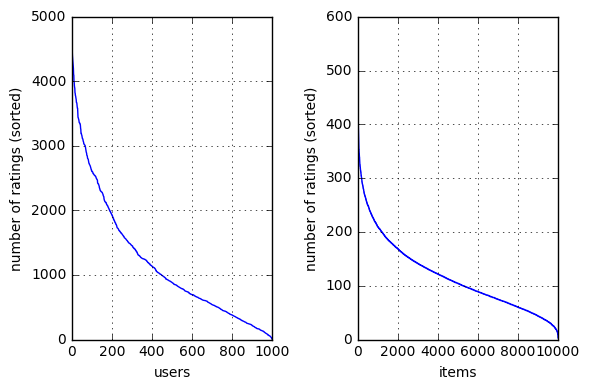

In [2]:
path_dataset = "../data/data_train.csv"
ratings = load_data(path_dataset)

num_items_per_user, num_users_per_item = plot_raw_data(ratings)

In [3]:
from helpers import *
valid_ratings, train, test = split_data(ratings, num_items_per_user, num_users_per_item, min_num_ratings=0, p_test=0.1)

#plot_train_test_data(train, test)

print(valid_ratings.shape)
print(train.shape)
print(test.shape)

Total number of nonzero elements in origial data:1176952
Total number of nonzero elements in train data:1059256
Total number of nonzero elements in test data:117696
(10000, 1000)
(10000, 1000)
(10000, 1000)


# Find the best values of the hyper-parameters

## Lambdas user

In [22]:
from mf_sgd import *
from plots import *

num_epochs = 10
gamma = 0.01

#lambdas_user = np.array([0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1])[:,np.newaxis]
lambdas_user = np.array([0.0000001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 3, 5, 10])[:,np.newaxis]
lambda_item = 0

num_experiments = len(lambdas_user)
rmse_train = np.zeros((num_experiments, 1))
rmse_test = np.zeros((num_experiments, 1))

num_features = 20

for i in range(0, len(lambdas_user)):
    print('MF SGD started for lambdas(user,item) = (%s,%s)' % (str(lambdas_user[i]),str(lambda_item)))
    rmse_train[i], rmse_test[i] = mf_sgd(train, test, num_epochs, gamma, num_features, lambdas_user[i], lambda_item)


MF SGD started for lambdas(user,item) = ([  1.00000000e-07],0)
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.0128260874440802.
iter: 1, RMSE on training set: 0.9874448116940266.
iter: 2, RMSE on training set: 0.9776524357915728.
iter: 3, RMSE on training set: 0.9694378741139242.
iter: 4, RMSE on training set: 0.962351218954625.
iter: 5, RMSE on training set: 0.9575536698859098.
iter: 6, RMSE on training set: 0.9530182618747205.
iter: 7, RMSE on training set: 0.9499798125505242.
iter: 8, RMSE on training set: 0.9465706704216058.
iter: 9, RMSE on training set: 0.9445961834797911.
RMSE on test data: 1.0344800314392517.
MF SGD started for lambdas(user,item) = ([ 0.0001],0)
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.0128222222891692.
iter: 1, RMSE on training set: 0.9874402132056656.
iter: 2, RMSE on training set: 0.9776472137382171.
iter: 3, RMSE on training set: 0.9694307897582188.
iter: 4, RMSE on training set: 0.9623436665

[[  1.00000000e-07]
 [  1.00000000e-04]
 [  1.00000000e-03]
 [  5.00000000e-03]
 [  1.00000000e-02]
 [  5.00000000e-02]
 [  1.00000000e-01]
 [  5.00000000e-01]
 [  1.00000000e+00]
 [  3.00000000e+00]
 [  5.00000000e+00]
 [  1.00000000e+01]]


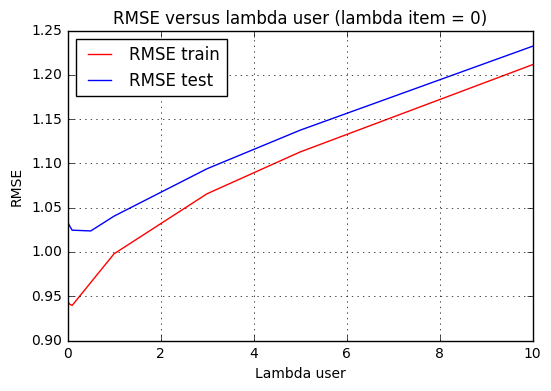

In [23]:
from plots import *
print(lambdas_user)
rmse_visualization_vs_lambdas_user(lambdas_user, lambda_item, rmse_train, rmse_test, "rmse_vs_lambdas_user.png")

## Lambdas item

In [33]:
from mf_sgd import *
from plots import *

num_epochs = 1
gamma = 0.01

#lambdas = np.array([0.01, 0.05, 0.1, 0.5])[:,np.newaxis]
lambda_user = 0
lambdas_item = np.array([0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 0.15, 0.20, 0.25, 0.3])[:,np.newaxis]

num_experiments = len(lambdas_item)
rmse_train = np.zeros((num_experiments, 1))
rmse_test = np.zeros((num_experiments, 1))

num_features = 20

for i in range(0, len(lambdas_item)):
    print('MF SGD started for lambdas(user,item) = (%s,%s)' % (str(lambda_user),str(lambdas_item[i])))
    rmse_train[i], rmse_test[i] = mf_sgd(train, test, num_epochs, gamma, num_features, lambda_user, lambdas_item[i])


MF SGD started for lambdas(user,item) = (0,[  1.00000000e-09])
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.0128260911072973.
RMSE on test data: 1.0603977837680794.
MF SGD started for lambdas(user,item) = (0,[  1.00000000e-08])
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.012826089213375.
RMSE on test data: 1.060397779888081.
MF SGD started for lambdas(user,item) = (0,[  1.00000000e-07])
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.0128260702738197.
RMSE on test data: 1.0603977410880385.
MF SGD started for lambdas(user,item) = (0,[  1.00000000e-06])
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.0128258808819146.
RMSE on test data: 1.0603973530921398.
MF SGD started for lambdas(user,item) = (0,[  1.00000000e-05])
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.0128239872742593.
RMSE on test data: 1.0603934735804548.
MF SGD started fo

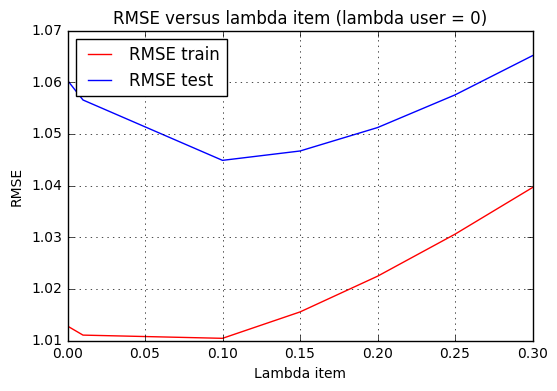

In [34]:
rmse_visualization_vs_lambdas_item(lambdas_item, lambda_user, rmse_train, rmse_test, "rmse_vs_lambdas_item.png")

## Lambdas user and item

In [29]:
from mf_sgd import *
from plots import *

num_epochs = 10 
gamma = 0.01

lambdas = np.array([0.0001, 0.01, 0.05, 0.1, 0.5])[:,np.newaxis]

lambdas_user = np.repeat(lambdas, len(lambdas))[:,np.newaxis]
lambdas_item = np.kron(np.ones((len(lambdas),1)), lambdas)

num_experiments = len(lambdas_user)
rmse_train = np.zeros((num_experiments, 1))
rmse_test = np.zeros((num_experiments, 1))

num_features = 30

for i in range(0, len(lambdas_user)):
    print('MF SGD started for lambdas(user,item) = (%s,%s)' % (str(lambdas_user[i]),str(lambdas_item[i])))
    rmse_train[i], rmse_test[i] = mf_sgd(train, test, num_epochs, gamma, num_features, lambdas_user[i], lambdas_item[i])


MF SGD started for lambdas(user,item) = ([ 0.0001],[ 0.0001])
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.0317137176142817.
RMSE on test data: 1.0897592689540938.
MF SGD started for lambdas(user,item) = ([ 0.0001],[ 0.01])
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.029032632372085.
RMSE on test data: 1.0840957207602848.
MF SGD started for lambdas(user,item) = ([ 0.0001],[ 0.05])
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.0237252811859714.
RMSE on test data: 1.0698900186885596.
MF SGD started for lambdas(user,item) = ([ 0.0001],[ 0.1])
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.0232527651748482.
RMSE on test data: 1.062394623654321.
MF SGD started for lambdas(user,item) = ([ 0.0001],[ 0.5])
learn the matrix factorization using SGD...
iter: 0, RMSE on training set: 1.071255653852079.
RMSE on test data: 1.0925766754339326.
MF SGD started for lambdas(user,i

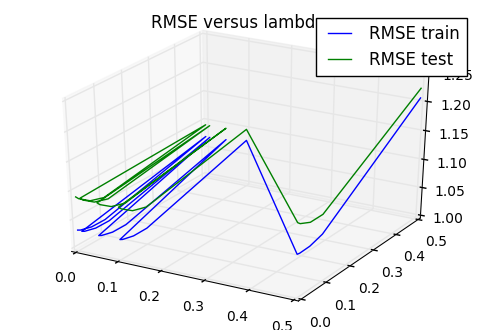

In [30]:
rmse_visualization_vs_lambdas(lambdas_user, lambdas_item, rmse_train, rmse_test, "rmse_vs_lambdas.png")


## Find The best "number of features"

In [ ]:
from mf_sgd import *
from plots import *

num_epochs = 2
gamma = 0.01

lambda_user = 0
lambda_item = 0

num_features_list = np.array([10, 30, 50])

rmse_train = np.zeros((len(num_features_list), 1))
rmse_test = np.zeros((len(num_features_list), 1))

for i, num_features in enumerate(num_features_list):
    print('MF SGD started for %d features' % (num_features))
    rmse_train[i], rmse_test[i] = mf_sgd(train, test, num_epochs, gamma, num_features, lambda_user, lambda_item)
    

In [ ]:
# Normalization of rmse
max_rmse_train = np.max(rmse_train)
max_rmse_test = np.max(rmse_test)
rmse_train_norm = np.divide(rmse_train, max_rmse_train)
rmse_test_norm = np.divide(rmse_test, max_rmse_test)
rmse_visualization_vs_num_features(num_features_list, rmse_train_norm, rmse_test_norm, "rmse_vs_num_features.png")

In [ ]:
a = np.array([1,2,3,4,5])
b = np.array([5,6,7,8,9])

c = np.concatenate((a,b),axis=0)
max_val = np.max(c)
print(max_a)
print(np.divide(a,max_val))
print(np.divide(b,max_val))


In [ ]:
np.zeros((2,2))

Compute X_pred = W*Z using the best values of the hyper-parameters

In [ ]:
"""matrix factorization by SGD."""

data = ratings

# define parameters
gamma = 0.01
num_features = 20   # K in the lecture notes
lambda_user = 0.1
lambda_item = 0.7
num_epochs = 2     # number of full passes through the train set

errors = [0]

# set seed
np.random.seed(988)

# init matrix
Z_opt, W_opt = init_MF(data, num_features)

# find the non-zero ratings indices 
nz_row, nz_col = data.nonzero()
nz_data = list(zip(nz_row, nz_col))

print("learn the matrix factorization using SGD...")
for it in range(num_epochs):        
    # shuffle the rating indices
    np.random.shuffle(nz_data)
    
    # decrease step size
    gamma /= 1.2

    for d, n in nz_data:
        e = train[d,n] - prediction(W[:,d],Z[:,n])
        Z_opt[:,n] += gamma * (e*W_opt[:,d] - lambda_item*Z_opt[:,n])
        W_opt[:,d] += gamma * (e*Z_opt[:,n] - lambda_user*W_opt[:,d])

    nz_row, nz_col = data.nonzero()
    nz_data = list(zip(nz_row, nz_col))
    rmse = compute_error(data,Z_opt,W_opt, nz_data)
    print("iter: {}, RMSE on training set: {}.".format(it, rmse))

    errors.append(rmse)
    
X_pred = prediction(W_opt,Z_opt) # Shape is DxN (D items, N users)

Create submission file

In [ ]:
from collections import deque
import datetime
from helpers import *
now = datetime.datetime.now()
now_str = now.strftime("%d-%m-%Y_%Hh%M_%S")
output_path = '../data/predictions-%s-group-clm.csv' % now_str

indices = extract_indices('../data/sampleSubmission.csv')

ratings_to_write = deque()
for row, col in indices:
    ratings_to_write.append((row, col, X_pred[row,col]))
    
create_csv_submission(ratings_to_write, output_path)
